In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [42]:
df = pd.read_csv(r"C:\Users\Yagnesh Narola\Documents\Coding Languages\Artificial Intelligence\Excel_and_CSV\manufacturing.csv")

In [43]:
df

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [72]:
poly = PolynomialFeatures(degree = 2)
model = LinearRegression()
model2 = LinearRegression()
scaler = StandardScaler()
rd = Ridge()
ls = Lasso()

In [44]:
df.isnull().sum()

Temperature (°C)                  0
Pressure (kPa)                    0
Temperature x Pressure            0
Material Fusion Metric            0
Material Transformation Metric    0
Quality Rating                    0
dtype: int64

In [45]:
df.describe()

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,3957.000000,3957.000000,3957.000000,3957.000000,3.957000e+03,3957.000000
mean,200.034704,14.815558,2955.321308,48127.183128,1.003645e+07,96.260179
std,58.135717,5.772040,1458.224940,23812.213513,7.599356e+06,12.992262
min,100.014490,5.003008,513.706875,10156.971955,9.999462e+05,1.000000
25%,150.871296,9.692984,1798.247303,27626.929091,3.433810e+06,99.941129
50%,198.603371,14.832557,2678.277782,44611.452164,7.833390e+06,99.999997
75%,251.366552,19.749680,3929.058261,67805.443846,1.588251e+07,100.000000
max,299.992804,24.999132,7365.018714,103756.181544,2.699783e+07,100.000000


In [46]:
df.shape

(3957, 6)

<Axes: ylabel='Temperature x Pressure'>

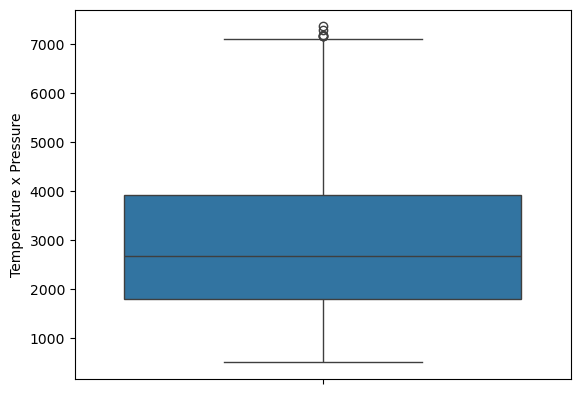

In [47]:
sns.boxplot(df['Temperature x Pressure'])

<Axes: ylabel='Quality Rating'>

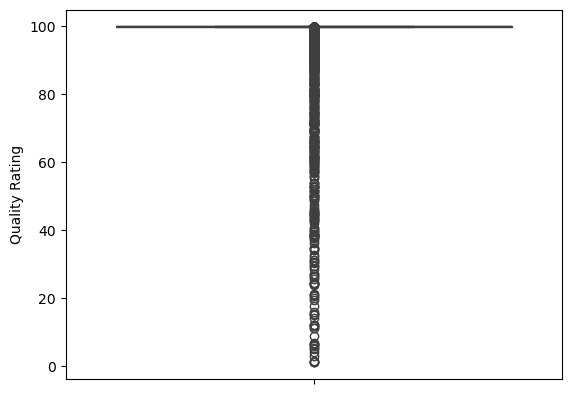

In [48]:
sns.boxplot(df['Quality Rating'])

In [63]:
df2 = df.copy()
def Outliers(df2,cols):
    q1 = df2[cols].quantile(0.25)
    q3 = df2[cols].quantile(0.75)
    iqr = q3 - q1
    upperlimit = q3 + (1.5 * iqr)
    lowerlimit = q1 - (1.5 * iqr)
    print(lowerlimit,upperlimit)
    df2.loc[(df2[cols]>upperlimit),cols] = lowerlimit
    df2.loc[(df2[cols]<lowerlimit),cols] = lowerlimit
    return df2
cols = ['Temperature x Pressure','Quality Rating']
for i in cols:
    df2 = Outliers(df2,i)

-1397.9691337849124 7125.274698533047
99.85282252606578 100.08830648431461


In [64]:
df['Quality Rating'].tail()

3952    100.000000
3953     99.999997
3954     99.989318
3955     99.999975
3956    100.000000
Name: Quality Rating, dtype: float64

<Axes: ylabel='Quality Rating'>

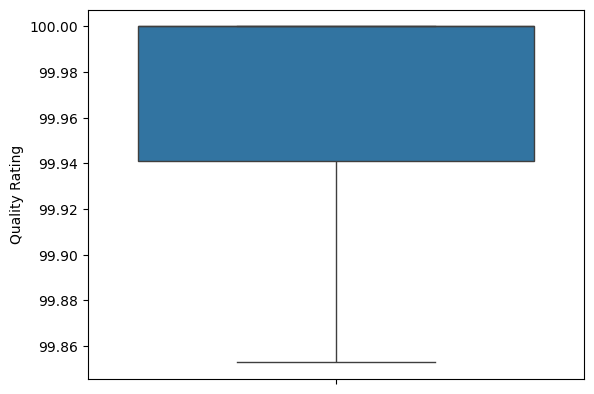

In [65]:
sns.boxplot(df2['Quality Rating'])

<Axes: ylabel='Temperature (°C)'>

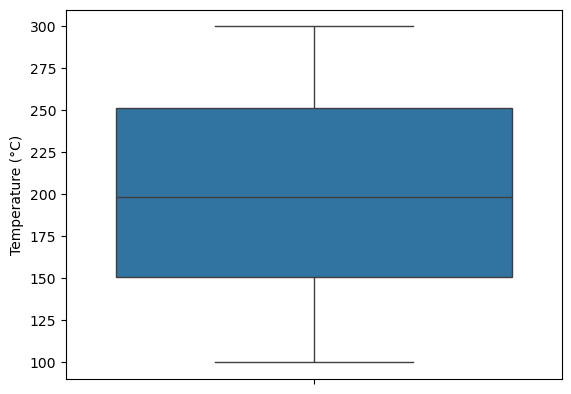

In [67]:
sns.boxplot(df2['Temperature (°C)'])

In [68]:
df2

,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000
...,...,...,...,...,...,...
3952,156.811578,21.794290,3417.596965,34941.963896,3.855501e+06,100.000000
3953,197.850406,8.291704,1640.516924,39714.857236,7.744742e+06,99.999997
3954,241.357144,16.391910,3956.304672,62657.690952,1.405957e+07,99.989318
3955,209.040239,23.809936,4977.234763,57195.985528,9.134036e+06,99.999975


In [74]:
x = df.drop(columns = 'Quality Rating')
y = df['Quality Rating']

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state = 70, test_size = 0.2)

In [76]:
scaler.fit(xtrain)
xtrainscaled = scaler.transform(xtrain)
xtestscaled = scaler.transform(xtest)

In [83]:
model.fit(xtrainscaled,ytrain)
linear = model.score(xtestscaled,ytest)

In [84]:
poly.fit(xtrain)
xtrainpoly = poly.transform(xtrain)
xtestpoly = poly.transform(xtest)
model2.fit(xtrainpoly,ytrain)
polyno = model2.score(xtestpoly,ytest)

In [90]:
rd.fit(xtrainscaled,ytrain)
ridge = rd.score(xtestscaled,ytest)

In [89]:
ls.fit(xtrainscaled,ytrain)
lassor = ls.score(xtestscaled,ytest)

In [93]:
print("Linear Regression:",linear)
print("Polynomial Regression",polyno)
print("Ridge Regression",ridge)
print("Lasso Regression",lassor)

Linear Regression: 0.5122793451735682
Polynomial Regression 0.9246794504953783
Ridge Regression 0.5123822427179572
Lasso Regression 0.3283267980245289
